# Examples from 'Python Machine Learning'

## General notes:
* Under vs Overfitting:
 * Underfit: The model is too generic, does not have the right features and therefore does is not sufficiently accurate
 * Overfit: The model is to precise and fits too closely to the training data, but does not predict test data well.
* Bias vs Variability:
 * Bias: The bias is error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (_underfitting_).
 * Variance: The variance is error from sensitivity to small fluctuations in the training set. High variance can cause _overfitting_: modeling the random noise in the training data, rather than the intended outputs.

In [10]:
%matplotlib inline

from sklearn import datasets
import numpy as np

# load the iris dataset
iris = datasets.load_iris()
X = iris.data[:,[2,3]] # petal length and petal width only
Y = iris.target # the class names

# split the iris data set into a testing and training set
from sklearn.cross_validation import train_test_split
# Assign 30% of samples to the test set randomly
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Standardise the scale of the features in the dataset
# StandardScaler finds the mean and std deviation of the sample and standardises the sample
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

from sklearn.metrics import accuracy_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [4]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and colour map
    markers = ('s', 'x', 'o', '^', 'v')
    colours = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colours[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], 
                    alpha=0.8, c=cmap(idx), 
                    marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')

### Perceptron
With a learning rate of 0.01, 40 epochs

Misclassified samples: 4
Accuracy: 0.91


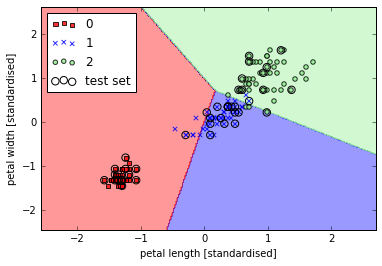

In [31]:
from sklearn.linear_model import Perceptron
# 40 iterations (epochs), learning rate of 0.01
ppn = Perceptron(n_iter=40, eta0=0.01, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

With a learning rate of 10, 40 epochs
OCnverges, so makes no difference

Misclassified samples: 4
Accuracy: 0.91


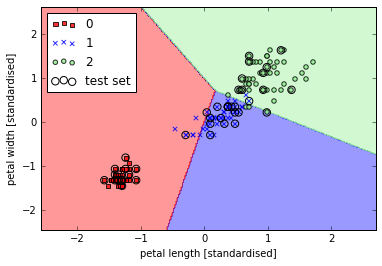

In [36]:
from sklearn.linear_model import Perceptron
# 40 iterations (epochs), learning rate of 0.1
ppn = Perceptron(n_iter=40, eta0=10, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

### Logistic Regression
* Classification model
* Easy to implement
* Performs well on linearly separable classes
* Odds ratio: odds in favour of an event => p / (1-p)
* The log of the odds ratio turns the 0..1 into the entire real number range
* This makes a sigmoid curve

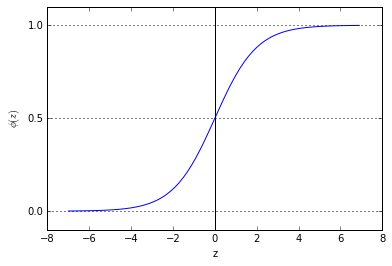

In [37]:
# Sigmoid curve

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

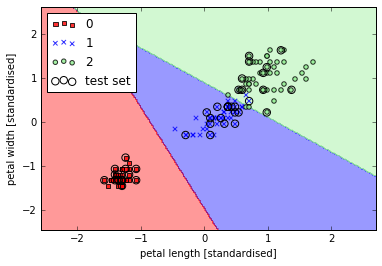

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=lr, 
                      test_idx=range(105,150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

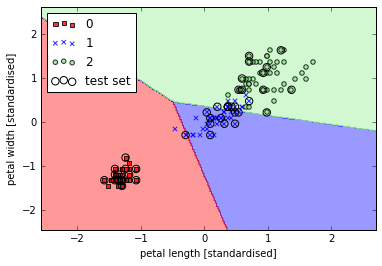

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=lr, 
                      test_idx=range(105,150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

### Support Vector Machines
* Similar to Perceptron in that is minimises misclassification errors
* SVM's optimisation objective is to maximise the margin between the 'separating hyperplane' (the boundary between classes) and the nearest samples (which are called the support vectors).
* *C* is used to control the width of the margin: low C = large border

Linear SVM:

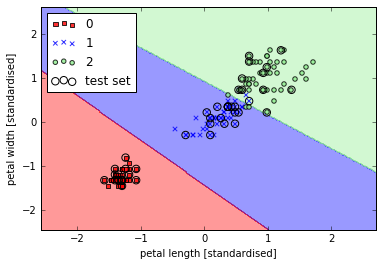

In [44]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=svm, 
                      test_idx=range(105,150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

### Non-linear SVM on a random XOR dataset

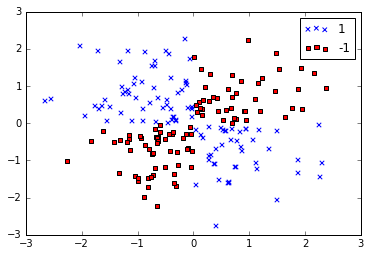

In [48]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

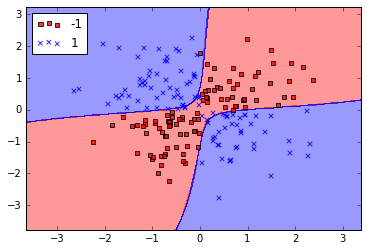

In [50]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, 
                      classifier=svm)
plt.legend(loc='upper left')
plt.show()

### Non-Linear SVM on the Iris data set: Effect gamma
C sets the size of the margin (small C: big margin)

C = 1.0, gamma=0.2:

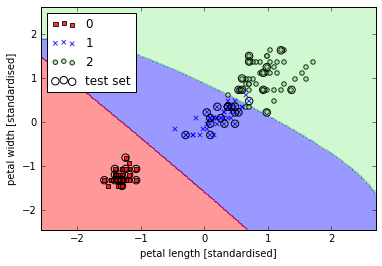

In [61]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=svm, 
                      test_idx=range(105,150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

### C=1.0, gamma=100.0 : Over-fit!

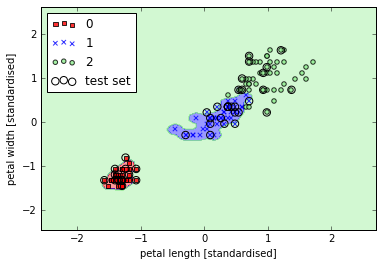

In [52]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=svm, 
                      test_idx=range(105,150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

### C=1.0, gamma=50 : Reasonable fit

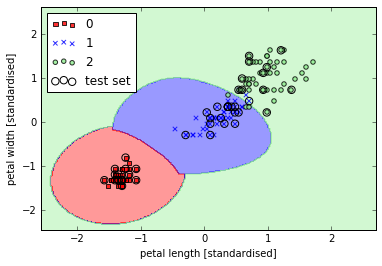

In [58]:
svm = SVC(kernel='rbf', random_state=0, gamma=1.5, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=svm, 
                      test_idx=range(105,150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

## Decision Tree Learning
* Good choice for interpretability (explaining _why_ the model chose a particular classification)
* Start with the feature that provides the most _Information Gain_ and split the group on that
* Then recursively keep splitting until the nodes created are pure (contain only one classification)
* Two most common methods are Gini Impurity and Entropy, both of which get a very similar result
* Because Decision Trees are not based on equations, they don't need scaled features (but it can be useful for visualising the results
* Decision trees can go very deep and can lead to overfitting. As a result they are often _pruned_ to keep them general enough, or set with a max depth at creation


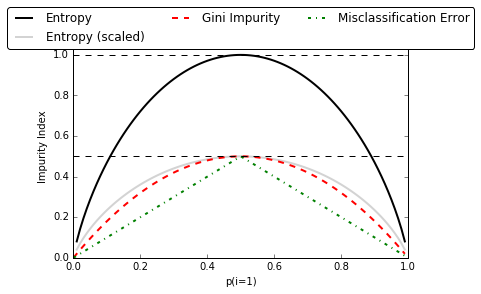

In [6]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                         ['Entropy', 'Entropy (scaled)',
                         'Gini Impurity',
                         'Misclassification Error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

Misclassified samples: 1
Accuracy: 0.98


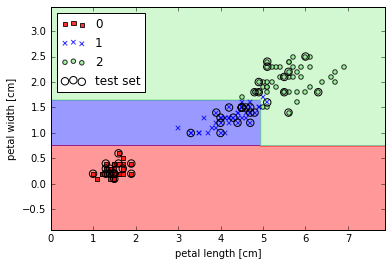

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3, 
                              random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined, 
                      y_combined, 
                      classifier=tree, 
                      test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left') 
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree,
               out_file='tre.dot',
               feature_names=['petal length', 'petal width'])

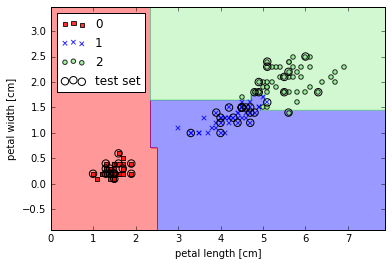

In [8]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=10,
                               random_state=1,
                               n_jobs=2)
forest.fit(X_train, y_train)


plot_decision_regions(X_combined, 
                      y_combined, 
                      classifier=forest, 
                      test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left') 
plt.show()

## K-nearest neighbours
* KNN is a _lazy learner_: it doesn not learn a discriminative function, but instead memorises the training set
* KNN is a _non-parametric model_: it does not estimate parameters from the training set to learn a function that can classify new data without requiring reference to the training set. Because of this, the number of parameters grows with the training set.
* KNN belogs to a subcategory of _non-parametric models_ known as _instance-based learning_: characterised by memorising the training set. _Lazy learning_ is a special case of this that has zero cost to train.
### How KNN works
1. Choose the number of _k_ and a distance metric
2. Find the _k_ nearest neighbours of the sample that we want to classify
3. Assign the class label by the majority vote
### Advantages / Disadvantages
* Main advantage is that the memory-based approach is that the classifier immediately adapts to new training data.
* Disadvantage: computational complexity for classifying new samples grows linearly with the number of samples
* Storage: Because the classification works directly on the samples, we can't drop/forget old samples when classifying new samples, meaning that we need to store all samples forever.

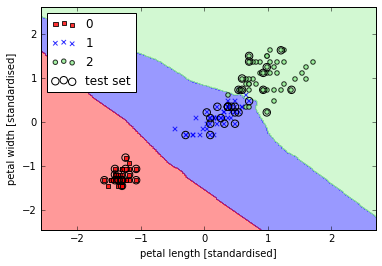

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=knn, 
                      test_idx=range(105,150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left') 
plt.show()